# Colorizing Birds on TSNE

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

In [3]:
# save_dpath = '/projects/MultiActiveAI/Samir_VICReg_Outputs/tsne_outputs_gain_excluded_repetition3'
save_dpath = '/projects/MultiActiveAI/Samir_VICReg_Outputs/tsne_outputs_final'

df = pd.read_csv (os.path.join(save_dpath, 'Data.csv'))

df

,Unnamed: 0,detection,confidence,year,month,day,hour,minute,second,week,weekday,device,set,x,y,labels,paths
0,0,No detection,1.000000,2021,6,7,5,29,42,23,1,23764,set1,55.911781,53.082493,80,set1/00023764/20210607_STUDY/20210607T050000+0...
1,1,No detection,1.000000,2021,8,18,0,19,0,33,3,23795,set3,62.338558,-100.753777,812,set3/00023795/20210817_STUDY/20210817T234600-0...
2,2,Common Yellowthroat,0.101613,2021,5,31,10,17,42,22,1,23764,set1,86.365318,78.219185,0,set1/00023764/20210531_STUDY/20210531T100000+0...
3,3,Indigo Bunting,0.445978,2021,5,31,10,17,42,22,1,23764,set1,86.365318,78.219185,0,set1/00023764/20210531_STUDY/20210531T100000+0...
4,4,No detection,1.000000,2021,8,20,4,10,25,33,5,4879,set3,29.915009,-104.473923,398,set3/00004879/20210819_STUDY/20210819T234549-0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206000,206000,Blackburnian Warbler,0.119140,2021,8,13,3,11,9,32,5,23734,set3,-7.442607,-130.941910,136,set3/00023734/20210813_STUDY/20210813T030845-0...
206001,206001,Indigo Bunting,0.272019,2021,7,6,8,4,4,27,2,23734,set1,-71.991364,-21.429605,618,set1/00023734/20210706_STUDY/20210706T063149-0...
206002,206002,No detection,1.000000,2021,6,20,23,5,15,24,7,23764,set1,42.511147,87.052155,142,set1/00023764/20210620_STUDY/20210620T230000+0...
206003,206003,Indigo Bunting,0.629860,2021,7,6,10,5,59,27,2,23734,set1,-83.632874,-15.461312,98,set1/00023734/20210706_STUDY/20210706T095444-0...


In [4]:
# df=df[df['detection']!='No detection']
# df=df[df['confidence']>0.7]

In [5]:
unique_labels = np.unique(df['detection'])
np.where(unique_labels == 'Eastern Wood-Pewee')[0].item()

36

In [6]:
from datetime import datetime

device_to_location = {
    4862: "Grassland 1",
    4879: "Grassland 2",
    23734: "Forest 1",
    23764: "Forest 2",
    23795: "Forest 3",
    23771: "Forest 4",
    23757: (datetime(month=7, day=14, year=2021, hour=14, second=55), ["Forest 3", "Forest 5"]),
    23700: "Forest 6",
}

In [7]:
data=[]
for row in df.iterrows():
    bird_label = np.where(unique_labels == row[1]['detection'])[0].item()
    auxiliary={}
    auxiliary['detection']=row[1]['detection']
    auxiliary['confidence']=row[1]['confidence']
    auxiliary['year']=row[1]['year']
    auxiliary['month']=row[1]['month']
    auxiliary['day']=row[1]['day']
    auxiliary['hour']=row[1]['hour']
    auxiliary['minute']=row[1]['minute']
    auxiliary['second']=row[1]['second']
    auxiliary['week']=row[1]['week']
    auxiliary['weekday']=row[1]['weekday']
    auxiliary['device']=row[1]['device']
    auxiliary['set']=row[1]['set']
    auxiliary['x']=row[1]['x']
    auxiliary['y']=row[1]['y']
    auxiliary['labels']=row[1]['labels']
    auxiliary['paths']=row[1]['paths']
    auxiliary['detection']=row[1]['detection']
    auxiliary['bird_label']=bird_label
    
    
    location = device_to_location[auxiliary['device']]
    if isinstance(location, tuple):
        date = datetime(month=auxiliary['month'], day=auxiliary['day'], year=auxiliary['year'], hour=auxiliary['hour'], second=auxiliary['second'])
        if date < location[0]:
            auxiliary['location'] = location[1][0]
        else:
            auxiliary['location'] = location[1][1]
    else:
        auxiliary['location'] = location

    data.append(auxiliary)
    
data = pd.DataFrame(data=data)
data

,detection,confidence,year,month,day,hour,minute,second,week,weekday,device,set,x,y,labels,paths,bird_label,location
0,No detection,1.000000,2021,6,7,5,29,42,23,1,23764,set1,55.911781,53.082493,80,set1/00023764/20210607_STUDY/20210607T050000+0...,61,Forest 2
1,No detection,1.000000,2021,8,18,0,19,0,33,3,23795,set3,62.338558,-100.753777,812,set3/00023795/20210817_STUDY/20210817T234600-0...,61,Forest 3
2,Common Yellowthroat,0.101613,2021,5,31,10,17,42,22,1,23764,set1,86.365318,78.219185,0,set1/00023764/20210531_STUDY/20210531T100000+0...,27,Forest 2
3,Indigo Bunting,0.445978,2021,5,31,10,17,42,22,1,23764,set1,86.365318,78.219185,0,set1/00023764/20210531_STUDY/20210531T100000+0...,51,Forest 2
4,No detection,1.000000,2021,8,20,4,10,25,33,5,4879,set3,29.915009,-104.473923,398,set3/00004879/20210819_STUDY/20210819T234549-0...,61,Grassland 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206000,Blackburnian Warbler,0.119140,2021,8,13,3,11,9,32,5,23734,set3,-7.442607,-130.941910,136,set3/00023734/20210813_STUDY/20210813T030845-0...,12,Forest 1
206001,Indigo Bunting,0.272019,2021,7,6,8,4,4,27,2,23734,set1,-71.991364,-21.429605,618,set1/00023734/20210706_STUDY/20210706T063149-0...,51,Forest 1
206002,No detection,1.000000,2021,6,20,23,5,15,24,7,23764,set1,42.511147,87.052155,142,set1/00023764/20210620_STUDY/20210620T230000+0...,61,Forest 2
206003,Indigo Bunting,0.629860,2021,7,6,10,5,59,27,2,23734,set1,-83.632874,-15.461312,98,set1/00023734/20210706_STUDY/20210706T095444-0...,51,Forest 1


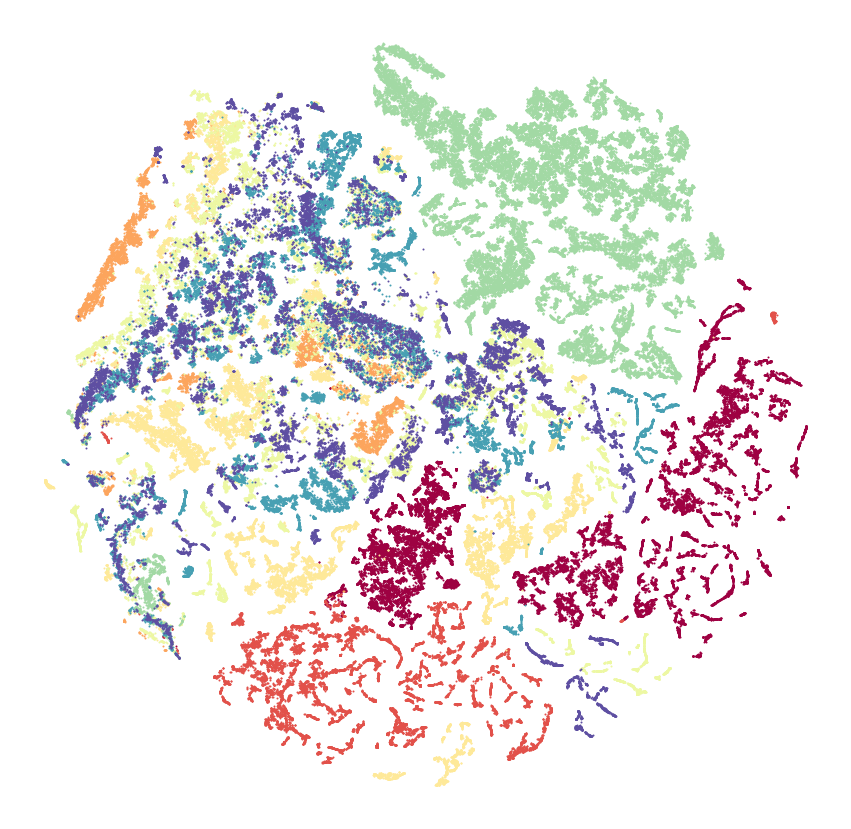

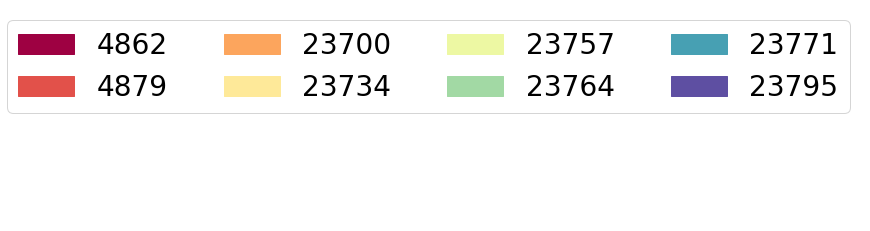

In [17]:
column = 'device'
labels = data[column]
f_embedded = np.transpose(np.array([data['x'], data['y']]))
unique_labels = sorted(set(labels))

cmap = plt.cm.get_cmap("twilight_shifted" if column == 'hour' else 'Spectral')
colors = [cmap(each) for each in np.linspace(0, 1, len(unique_labels))]

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[labels != -1] = True
n_noise_points = list(labels).count(-1)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

for k, col in zip(unique_labels, colors):
    detection_mask = (data['detection'] != "No detection") & (data['confidence'] > 0.9)
    class_member_mask = labels == k
    
    # This mask can be used to ignore particular devices.
    device_mask = ~data['device'].isin([4879, 23764])
    
    xy = f_embedded[class_member_mask & core_samples_mask]
    ax.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor=col,
        markersize=1,
    )        
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Hide X and Y axes label marks
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)

    # Hide X and Y axes tick marks
    ax.set_xticks([])
    ax.set_yticks([])

fig.set_size_inches(15, 15)
plt.savefig(f"tsne_{column}.png", dpi=300)

# Save legend separately
fig, ax = plt.subplots()
if column == "hour":
    pass

elif column != 'labels':
    patches = [mpatches.Patch(color=col, label=k) for k, col in zip(unique_labels, colors)]
    if column == "month":
        ncol = len(patches)
    elif column == "week":
        ncol = len(patches) // 3
    elif column == "location":
        ncol = len(patches) // 2
    elif column == "device":
        ncol = len(patches) // 2
    ax.legend(handles=patches, fontsize=28, ncol=ncol)
    plt.gca().set_axis_off()
    plt.savefig(f"tsne_legend_{column}.png", bbox_inches='tight')

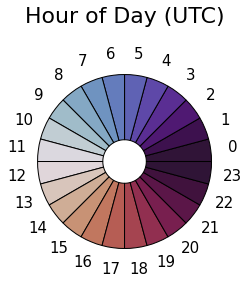

In [12]:
import matplotlib.pyplot as plt
import matplotlib

# Define the number of segments
num_segments = 24

# Generate colors for each segment
cmap = plt.cm.get_cmap("twilight_shifted")
colors = [cmap(each) for each in np.linspace(0, 1, 24)]

# Create a figure and axis
fig, ax = plt.subplots()

for i in range(num_segments):
    start_angle = 360 * i / num_segments
    end_angle = 360 * (i + 1) / num_segments
    wedge = matplotlib.patches.Wedge((0.5, 0.5), 0.4, start_angle, end_angle, width=0.3, edgecolor='black', facecolor=colors[i])
    ax.add_artist(wedge)

    # Add label for each wedge
    wedge_center = (start_angle + end_angle) / 2
    label_x = 0.5 + 0.5 * np.cos(np.deg2rad(wedge_center))
    label_y = 0.5 + 0.5 * np.sin(np.deg2rad(wedge_center))
    ax.text(label_x, label_y, str(i), ha='center', va='center', fontsize=15)

ax.set_title("Hour of Day (UTC)", fontsize=22, pad=30)

ax.set_aspect('equal')

ax.set_xticks([])
ax.set_yticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show the plot
plt.savefig("tsne_legend_hour.svg")

In [ ]:
# Colorbar
#     sm = plt.cm.ScalarMappable(cmap=cmap)
#     cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
#     fig.colorbar(sm, cax=cbar_ax)

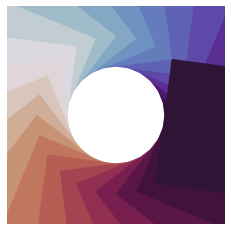

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap

# Define the number of arcs and the colormap
num_arcs = 24
cmap = get_cmap("twilight_shifted")

# Generate colors for the arcs
colors = cmap(np.linspace(0, 1, num_arcs))

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the colored arcs
for i in range(num_arcs):
    start_angle = i * 2 * np.pi / num_arcs
    end_angle = (i + 1) * 2 * np.pi / num_arcs
    ax.plot([np.cos(start_angle), np.cos(end_angle)],
            [np.sin(start_angle), np.sin(end_angle)],
            color=colors[i], linewidth=100)

# Set the aspect ratio to equal
ax.set_aspect('equal')

# Remove ticks and labels
ax.axis('off')

# Show the plot
plt.show()

In [8]:
aux=data.loc[:, data.columns!='paths']
aux=aux.loc[:, aux.columns!='detection']
aux=aux.loc[:, aux.columns!='set']
metrics.silhouette_score(aux, aux[column])

0.036611182789868156

In [9]:
n_clusters = len(unique_labels)
silhouette_avg = silhouette_score(aux, aux[column])
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(aux, aux[column])


For n_clusters = 774 The average silhouette_score is : 0.036611182789868156


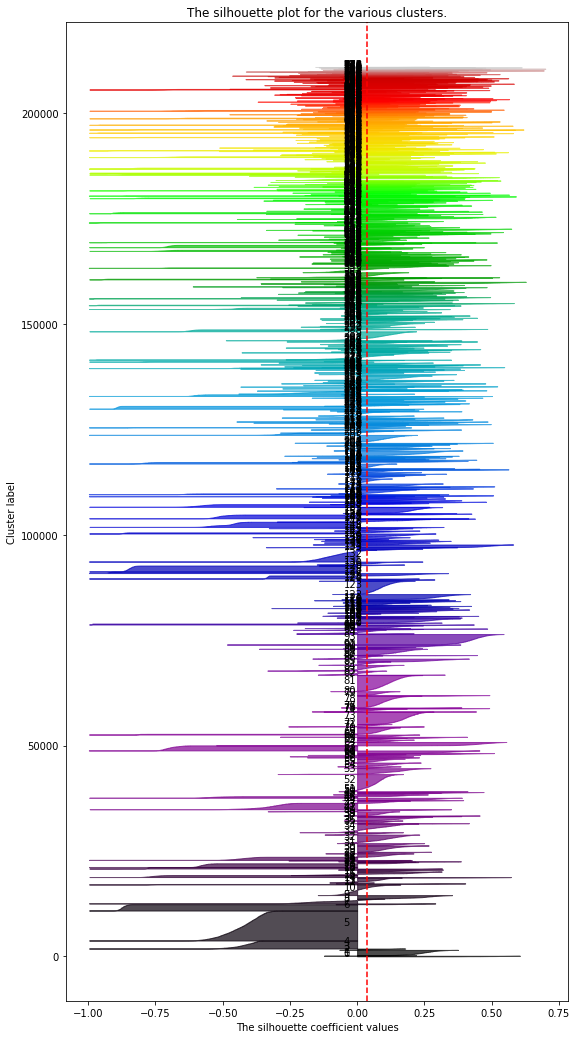

In [10]:
y_lower = 10
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(9, 18)
for i in unique_labels:
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[aux[column] == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")



In [11]:
unique_labels

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [12]:
aux

,confidence,year,month,day,hour,minute,second,week,weekday,device,x,y,labels,bird_label
0,0.225426,2021,7,15,15,16,5,28,4,23764,-73.072350,-70.966637,14,9
1,0.260608,2021,7,15,15,16,5,28,4,23764,-73.072350,-70.966637,14,9
2,1.000000,2021,8,23,4,2,11,34,1,4862,89.157127,-28.850824,0,60
3,0.251946,2021,7,5,12,46,20,27,1,23734,-13.379062,59.337894,2,50
4,0.400802,2021,7,16,13,51,39,28,5,23764,-62.881771,-68.098930,3,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203270,1.000000,2021,7,16,7,33,28,28,5,23734,-101.408409,26.515305,197,60
203271,1.000000,2021,7,22,16,32,18,29,4,23795,-5.432591,23.495115,5,60
203272,1.000000,2021,7,20,7,43,20,29,2,23764,3.065853,-58.533165,31,60
203273,1.000000,2021,7,4,14,44,2,26,7,23734,-35.866138,23.797695,40,60
